**=====================================================================**


# Project 2

**=====================================================================**

## Course-End Project: Healthcare

### Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 

### Dataset description:
#### Variable ; Description
- **Age:** Age in years
- **Sex:** 1 = male; 0 = female
- **cp:** Chest pain type
- **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
-**chol:** Serum cholesterol in mg/dl
- **fbs** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** Slope of the peak exercise ST segment
- **ca:** Number of major vessels (0-3) colored by fluoroscopy
- **thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect
- **Target:** 1 or 0; 1 is yes and 0 is no

#### Task to be performed:
**1.	Preliminary analysis:**
- a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
- b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

**2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:**
- a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
- b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 
- c.	Study the occurrence of CVD across the Age category
- d.	Study the composition of all patients with respect to the Sex category
- e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
- f.	Describe the relationship between cholesterol levels and a target variable
- g.	State what relationship exists between peak exercising and the occurrence of a heart attack
- h.	Check if thalassemia is a major cause of CVD
- i.	List how the other factors determine the occurrence of CVD
- j.	Use a pair plot to understand the relationship between all the given variables

**3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection**






## Importing Libraries & Dataset

#### Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import dabl
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#### Import Data

In [2]:
# Load data
dataset = pd.read_excel('1645792390_cep1_dataset.xlsx')

## 1.	Preliminary analysis:

### a.	Perform preliminary data inspection

#### •	Data Dataframe

In [3]:
# Get the shape of dataframe
dataset.shape

(303, 14)

In [4]:
# View the first few rows of dqatafra,e
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<span style="color:magenta">**Dataset has 13 features and 1 target variable**<span>

In [5]:
# View informtion about dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<span style="color:magenta">**All the features are in numerical datatypes, though some may be ordinal features**<span>

### b.	Remove duplicates and treat missing values

#### •	Checking for Missing Values

In [6]:
# Get sum of missing vaues
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<span style="color:magenta">**There ar no missing values in the dataset**<span>

#### •	Checking for Duplicate Values

In [7]:
# View duplicate values
dataset.duplicated().sort_values()

0      False
205    False
204    False
203    False
202    False
       ...  
97     False
96     False
102    False
302    False
164     True
Length: 303, dtype: bool

<span style="color:magenta">**Row 164 is duplicated which we will remove**<span>

#### •	Removing Duplicate Values

In [8]:
# Drop duplicate values
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.duplicated().any()

False

<span style="color:magenta">**No duplicated values now!**<span>

## 2.	Prepare report explaining distribution & factors:

### a.	Get statistical summary - explore central tendencies

In [10]:
# View statistical information on numeric values in dataframe
dataset.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<span style="color:magenta">**For numeric data, the result’s include count, mean, std, min, max as well as lower, 50 and upper percentiles. The lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.**<span>

### b.	Identify data variables - categorical and describe - explore

#### •	Identify categoty features less than 10

In [11]:
# Pick features based on values less than 10
categorical_features = dataset.loc[:, (dataset < 10).any()].columns.to_list()

categorical_features

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

#### •	Confirming with number of uniques

In [12]:
dataset[categorical_features].nunique()

sex         2
cp          4
fbs         2
restecg     3
exang       2
oldpeak    40
slope       3
ca          5
thal        4
target      2
dtype: int64

<span style="color:magenta">**oldpeak contains over 40 unique entries**<span>

In [13]:
# Dropping oldpeak - it contains over 40 unique entries
categorical_features.remove('oldpeak')

#### •	Plot categorical_features

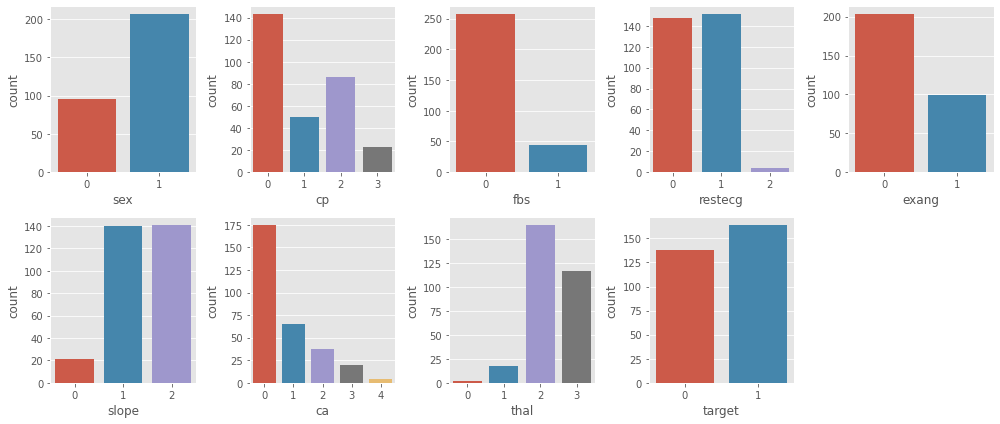

In [14]:
plt.figure(figsize=(14,6))
for i,features in enumerate(categorical_features):
    plt.subplot(2,5,i+1)
    sns.countplot(dataset[features])
    plt.tight_layout()

<span style="color:magenta">**From the 13 features withinin the dataframe 9 are categorigal, namely sex, cp, fbs, restecg, eang, slope, ca, thal & taget**<span>

### c.	Study the occurrence of CVD across the Age category¶

#### •	The occurence of CVD states that the cardio vascular disease is true = 1

In [15]:
# Get the data for only cvd true entries
cvd_true = dataset.loc[dataset.target == 1]

#### •	Plot cvd_true histograms

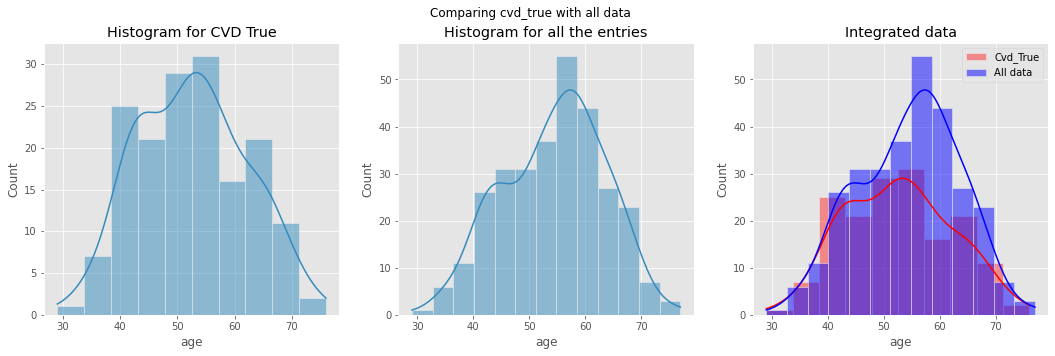

In [16]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(x=cvd_true.age,kde=True)
plt.title('Histogram for CVD True')

plt.subplot(1,3,2)
sns.histplot(x=dataset.age,kde=True)
plt.title('Histogram for all the entries')

plt.subplot(1,3,3)
sns.histplot(x=cvd_true.age,kde=True,label='Cvd_True',color='red',alpha=0.4)
sns.histplot(x=dataset.age,kde=True,label='All data',color='blue',alpha=0.5)
plt.title('Integrated data')
plt.legend()

plt.suptitle('Comparing cvd_true with all data')
plt.show()

### d.	Study composition of all patients respect to Sex category¶
0 : female and 1 : male

#### •	Using data analysis baseline library (dabl) 
- A tool to do supervised machine learning quickly
- Gives initial solutions to Machine Learning steps
- dabl.clean, dabl.plot, dabl.AnyClassifier, dabl.explain
- **Here we use dabl.plot to do much & faster visualizations**

Target looks like classification
Linear Discriminant Analysis training set score: 0.574


[[<Figure size 1080x1080 with 30 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

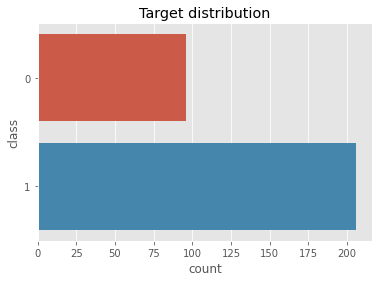

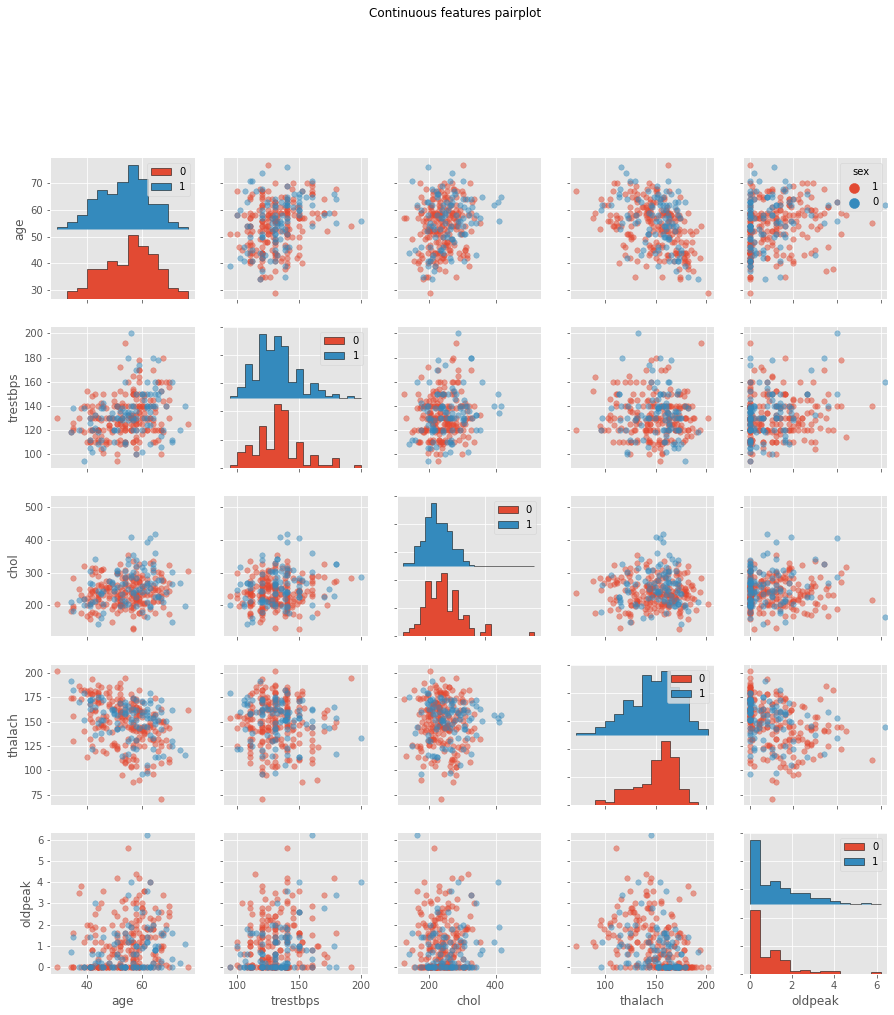

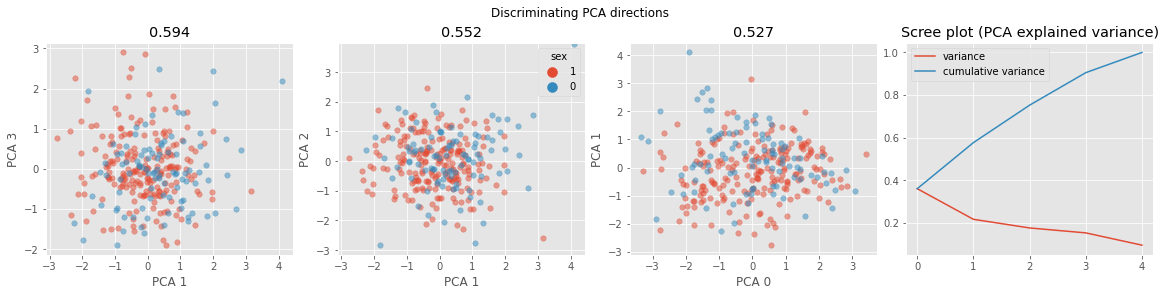

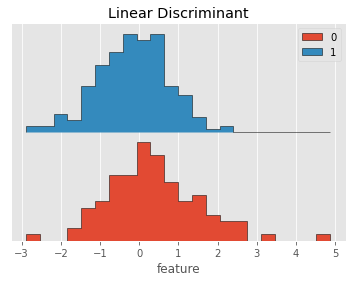

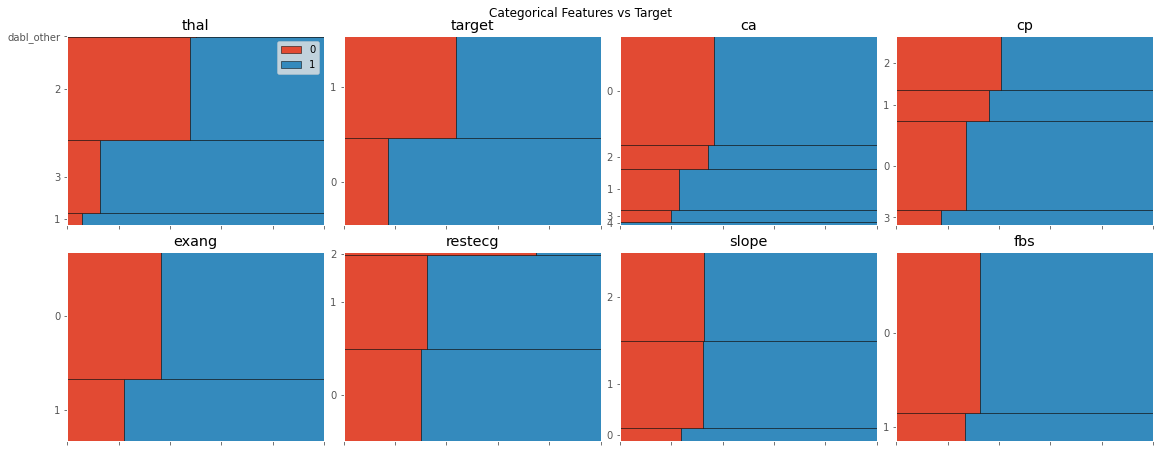

In [17]:
dabl.plot(dataset,'sex')

### e.	Study-detect heart attacks based on resting blood pressure 

#### •	Create a new dataframe with cvd: False

In [18]:
cvd_false = dataset.loc[dataset.target == 0]

#### •	Plotting 4 Subplots

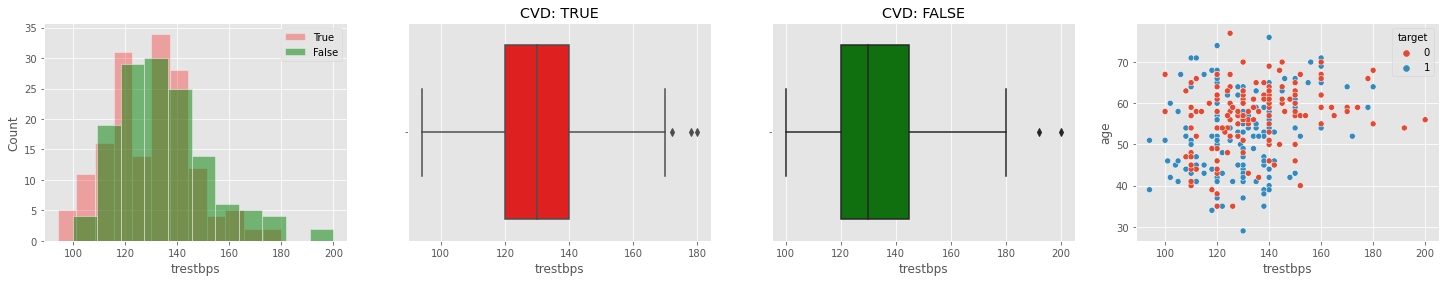

In [19]:
plt.figure(figsize=(25,4))
                    
# PLOTTING SUBPLOT_1; histograms cvd_true & cvd_false
plt.subplot(1,4,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.3, label='True')
sns.histplot(cvd_false.trestbps,color='green',alpha=0.5,label='False')
plt.legend()
                    
# PLOTTING SUBPLOT_2; boxplot cvd_true
plt.subplot(1,4,2)
sns.boxplot(cvd_true.trestbps,color='red')
plt.title("CVD: TRUE")

# PLOTTING SUBPLOT_3; boxplot cvd_false
plt.subplot(1,4,3)
sns.boxplot(cvd_false.trestbps,color='green')
plt.title("CVD: FALSE")

# PLOTTING SUBPLOT_4; scatterplot age & trestbps
plt.subplot(1,4,4)
sns.scatterplot(y=dataset.age, x=dataset.trestbps,hue=dataset.target)

plt.show()


<span style="color:magenta">**We observe that people who develop CVD have lower resting bp than people who don't develop CVD, and most develop in the age around 40 - 65**<span>

### f. Describe relation between cholesterol levels & target variable¶


#### •	Plotting Subplots

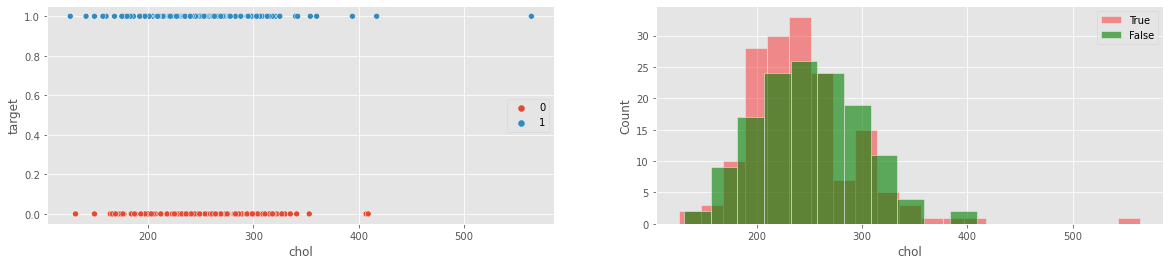

In [20]:
plt.figure(figsize=(20,4))

# PLOTTING SUBPLOT_1; scatterplot chol & target
plt.subplot(121)
sns.scatterplot(x=dataset.chol, y=dataset.target, hue=dataset.target)
plt.legend(loc='center right')

# PLOTTING SUBPLOT_2; histograms cvd_true.chol & cvd_false.chol
plt.subplot(122)
sns.histplot(cvd_true.chol, color='r',alpha=0.4,label='True')
sns.histplot(cvd_false.chol, color='green',alpha=0.6,label='False')
plt.legend()

<span style="color:magenta">**The people who develop CVD have much higher level of cholestrol sometimes and most are concentrated in the range of 200 - 300**<span>

### g. State relation of peak exercising & heart attack occurrence¶


#### •	Plotting Subplots

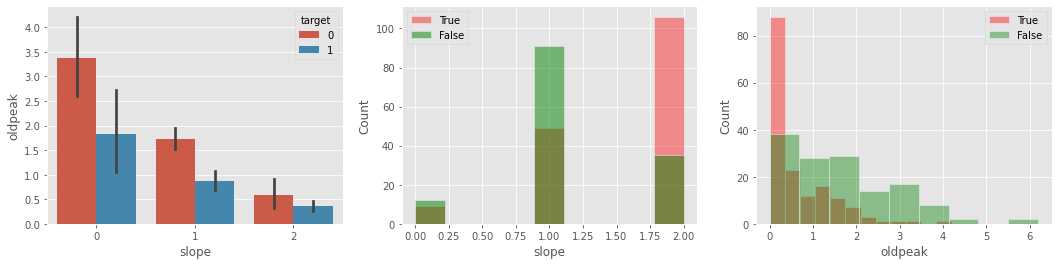

In [21]:
plt.figure(figsize=(18,4))

# PLOTTING SUBPLOT_1; barplot oldpeak & slope
plt.subplot(1,3,1)
sns.barplot(y=dataset.oldpeak, x=dataset.slope, hue=dataset.target)

# PLOTTING SUBPLOT_2; histograms cvd_true.slope & cvd_false.slope
plt.subplot(1,3,2)
sns.histplot(cvd_true.slope,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.slope,color='green',alpha=0.5,label='False')
plt.legend()

# PLOTTING SUBPLOT_3; histograms cvd_true.oldpeak & cvd_false.oldpeak
plt.subplot(1,3,3)
sns.histplot(cvd_true.oldpeak,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.oldpeak,color='green',alpha=0.4,label='False')

plt.legend()

<span style="color:magenta">**oldpeak** is lower in people who developed CVD, **slope: 2** was highest<span>

### h. Check if thalassemia is a major cause of CVD¶

#### •	Plotting Subplots

<AxesSubplot:xlabel='thal', ylabel='count'>

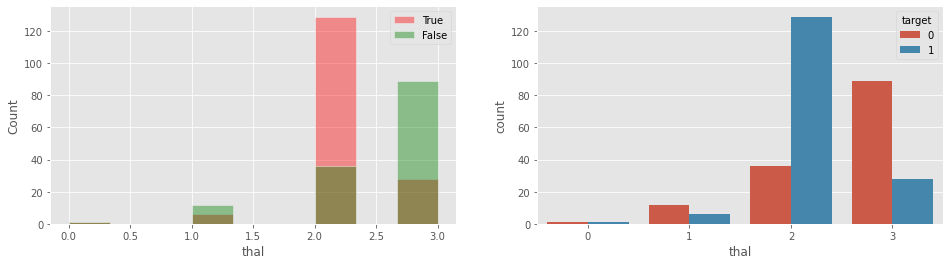

In [22]:
plt.figure(figsize=(16,4))

# PLOTTING SUBPLOT_1; histograms cvd_true.thal & cvd_false.thal
plt.subplot(1,2,1)
sns.histplot(cvd_true.thal,color='red',alpha=0.4,label='True')
sns.histplot(cvd_false.thal,color='green',alpha=0.4,label='False')
plt.legend()

# PLOTTING SUBPLOT_2; countplot thal
plt.subplot(1,2,2)
sns.countplot(dataset.thal,hue=dataset.target)

<span style="color:magenta">**Thalassemia can be a major cause in CVD as it is seen in more number in 2**<span>

### i.	List how the other factors determine the occurrence of CVD

In [23]:
other_factors = ['trestbps','chol','thalach','oldpeak']
other_X = dataset[other_factors]
other_X.head()

,trestbps,chol,thalach,oldpeak
0,145,233,150,2.3
1,130,250,187,3.5
2,130,204,172,1.4
3,120,236,178,0.8
4,120,354,163,0.6


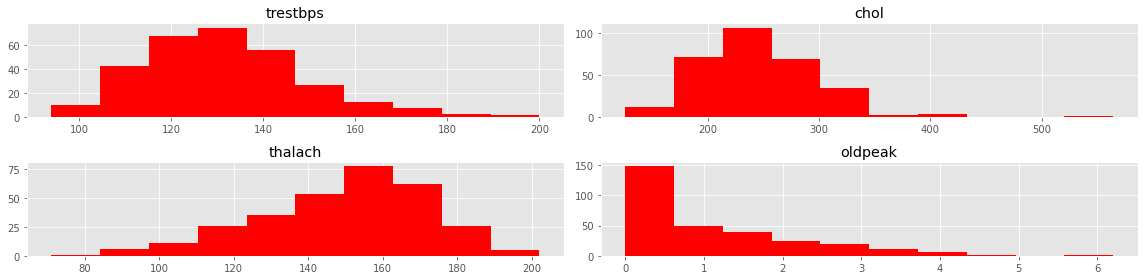

In [24]:
plt.figure(figsize=(16,4))
for i,features in enumerate(other_factors):
    plt.subplot(2,2,i+1)
    plt.title(features)
    #sns.histplot(other_X[features], color='red', bins=10)
    plt.hist(other_X[features], color='red', bins=10)
    plt.tight_layout()

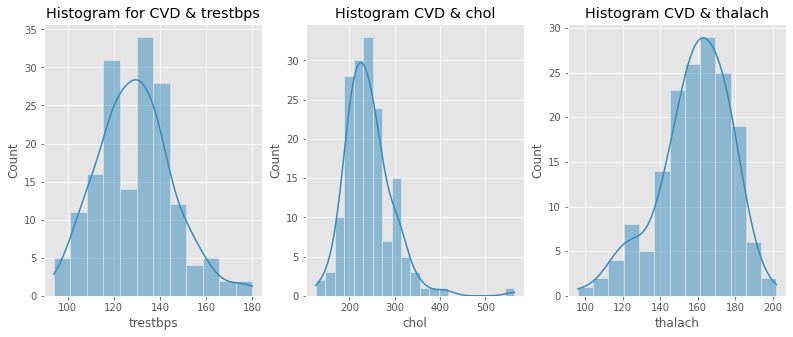

In [25]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.histplot(x=cvd_true.trestbps,kde=True)
plt.title('Histogram for CVD & trestbps')

plt.subplot(1,4,2)
sns.histplot(x=cvd_true.chol,kde=True)
plt.title('Histogram CVD & chol')

plt.subplot(1,4,3)
sns.histplot(x=cvd_true.thalach,kde=True)
plt.title('Histogram CVD & thalach')

plt.show()

### j. Use pair plot  for relationship between all the given variables¶


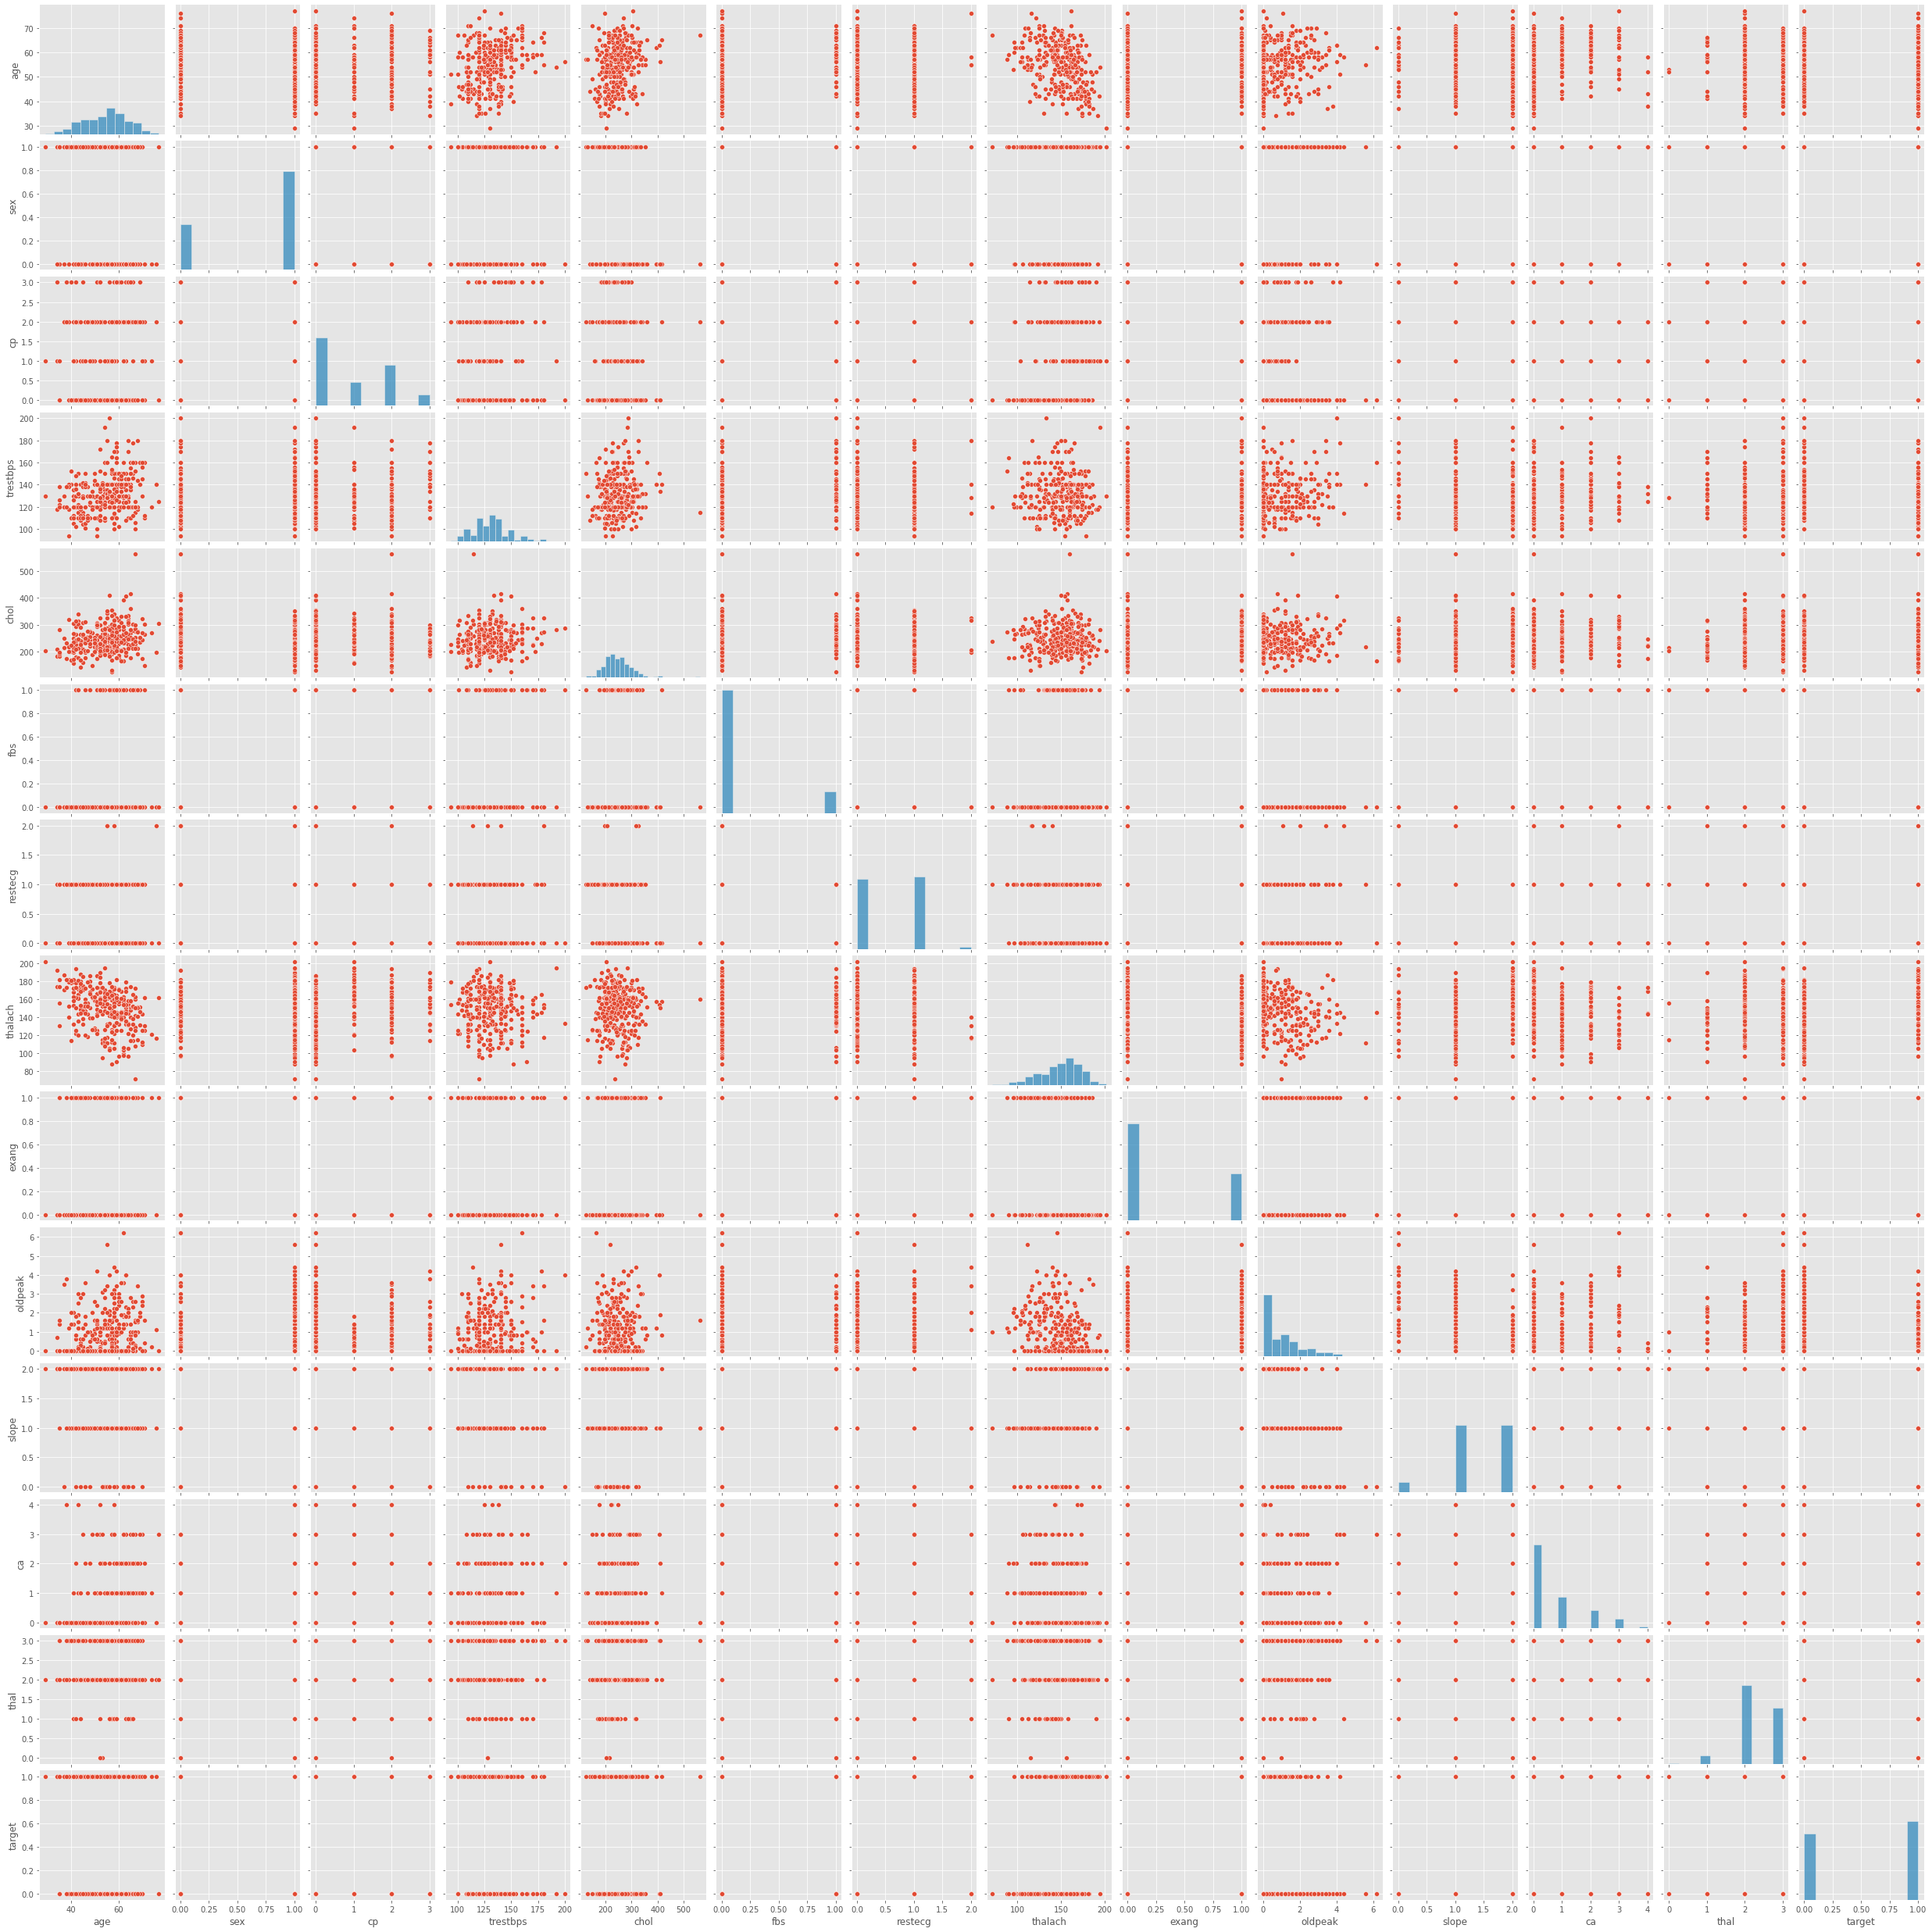

In [26]:
sns.pairplot(data=dataset)

## 3. Build baseline model to predict risk of heart attack

#### Logistic regression Scikit-Learn vs Statsmodel
- Scikit-learn is basically designed for machine learning, while Statsmodels is made for rigorous statistics. 
- Scikit-learn provides more models for regularization, while Statsmodels helps correct for broken OLS assumptions. 
- Scikit-learn allows the user to or not to add a constant through a parameter, while Statsmodels OLS class has a function that adds a constant to a given array.
- There is a biggest disadvantage with Statsmodels is that it is a newly developed package.


### • Using a Logistic Regression and Random Forest 

### •	a. Predict the risk of a heart attack using Logistic Regression

### Training and Testing

#### •	Import - train_test_split, score models and confusion_matrix

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### • Divide dataset into X indepemdent and y dependent

In [28]:
y = dataset['target']
X = dataset.drop('target', axis=1)

In [29]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### • Split into Train and Test

In [31]:
# 1) Split data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#### • Use Standard Scaler

In [32]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [33]:
# 2) Scale data with Standard scaler
scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [34]:
print('X_train:',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train: (241, 13)
X_test : (61, 13)
y_train: (241,)
y_test : (61,)


#### •	Import Model

In [35]:
# Import statsmodel
import statsmodels.api as sm

#### •	Create Logreg Model

In [36]:
# Fit logistic regression
logreg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.349009
         Iterations 7


#### •	Print Logreg Summary

In [37]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           12
Date:                Tue, 30 May 2023   Pseudo R-squ.:                  0.4932
Time:                        23:04:13   Log-Likelihood:                -84.111
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 9.349e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0500      0.235      0.213      0.831      -0.410       0.510
x2            -0.8346      0.243     -3.432      0.001      -1.311      -0.358
x3             0.7337      0.209      3.518      0.0

#### •	Create Prediction Variable for Logistic Regression

In [38]:
logreg_pred = logreg.predict(X_test)
preds = list(map(round, logreg_pred))

#### •	Display Performance Measures for Logistic Regression


  •Confusion Matrix for Logistic Regression•

Accuracy score 0.8360655737704918
Recall score 0.8125
Precision score 0.8666666666666667
f1 score 0.8387096774193549


<AxesSubplot:>

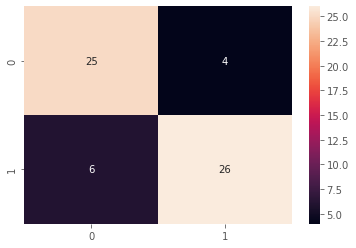

In [39]:
print('\n  •Confusion Matrix for Logistic Regression•\n')

print('Accuracy score',accuracy_score(y_test, preds))
print('Recall score',recall_score(y_test, preds))
print('Precision score',precision_score(y_test, preds))
print('f1 score',f1_score(y_test, preds))

cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)

In [40]:
# Confusion matrix metrics
matrix = classification_report(y_test,preds)
print('Classification Report: \n', matrix)

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<span style="color:magenta">**SUMMARY: Confusion Matrix Logistic Regression:**</span>
- Top-left: 25 TP – People who has Cardiovascular Disease algorithm correctly identified.
- Bottom-right: 26 TN - People who did not have CVD algorithm correctly identified.
- Bottom-left: 6 FN – Has Cardiovascular Disease but algorithm says they did not.
- Top-right: 4 FP – People who do not have CVD but the algorithm saus they do.


### •	b. Predict the risk of a heart attack using Random Forest

#### •	Import RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

#### •	Create Random Forest Model

In [80]:
rfModel = RandomForestClassifier(n_estimators=30)
rfModel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

#### •	Create Prediction Variable for Random Forest Model

In [81]:
rf_pred = rfModel.predict(X_test)
rfpred = list(map(round, rf_pred))

#### •	Display Performance Measures  for Random Forest


  •Confusion Matrix for Random Forest•

Accuracy score 0.8688524590163934
Recall score 0.84375
Precision score 0.9
f1 score 0.870967741935484


<AxesSubplot:>

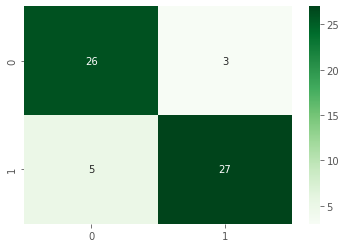

In [82]:
print('\n  •Confusion Matrix for Random Forest•\n')

print('Accuracy score',accuracy_score(y_test, rfpred))
print('Recall score',recall_score(y_test, rfpred))
print('Precision score',precision_score(y_test, rfpred))
print('f1 score',f1_score(y_test, rfpred))

cmRF = confusion_matrix(y_test,rfpred)
sns.heatmap(cmRF,annot=True,cmap="Greens")

<span style="color:magenta">**SUMMARY: Random Forest:**</span>
- Top-left: 26 TP – People who has Cardiovascular Disease algorithm correctly identified.
- Bottom-right: 27 TN - People who did not have CVD algorithm correctly identified.
- Bottom-left: 5 FN – Has Cardiovascular Disease but algorithm says they did not.
- Top-right: 3 FP – People who do not have CVD but the algorithm saus they do.

 ### •	c. Predict the risk of a heart attack using K Nearest Neighbor 

#### •	Import K Nearest Neighbor Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

#### •	Create  K Nearest Neighbor Model

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### • Create Prediction Variable for K Nearest Neighbor

In [83]:
knn_pred = knn.predict(X_test)
knnpred = list(map(round, knn_pred))

#### •	Display Performance Measures  for K Nearest Neighbor


  •Confusion Matrix for K Nearest Neighbor•

Accuracy score 0.819672131147541
Recall score 0.8125
Precision score 0.8387096774193549
f1 score 0.8253968253968254


<AxesSubplot:>

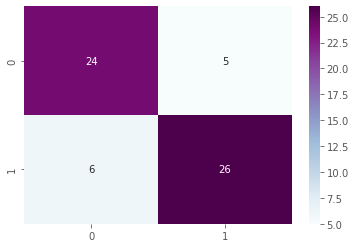

In [84]:
print('\n  •Confusion Matrix for K Nearest Neighbor•\n')

print('Accuracy score',accuracy_score(y_test, knnpred))
print('Recall score',recall_score(y_test, knnpred))
print('Precision score',precision_score(y_test, knnpred))
print('f1 score',f1_score(y_test, knnpred))

cmKNN = confusion_matrix(y_test,knnpred)
sns.heatmap(cmKNN,annot=True,cmap="BuPu")

In [51]:
print(classification_report(y_test,predKNN))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



<span style="color:magenta">**COMPARISON: Logistic Regression-Random Forest-K Nearest Neighbor**</span>

These three Confusion Matrices are very similar but Random Forest has a slight edge with 87% accuracy, Logistic Regression with 83% accuracy and Nearest Neighbor with 82% accuracy. Of the three Random forest is the winner.

### •	Explore results using correlation analysis

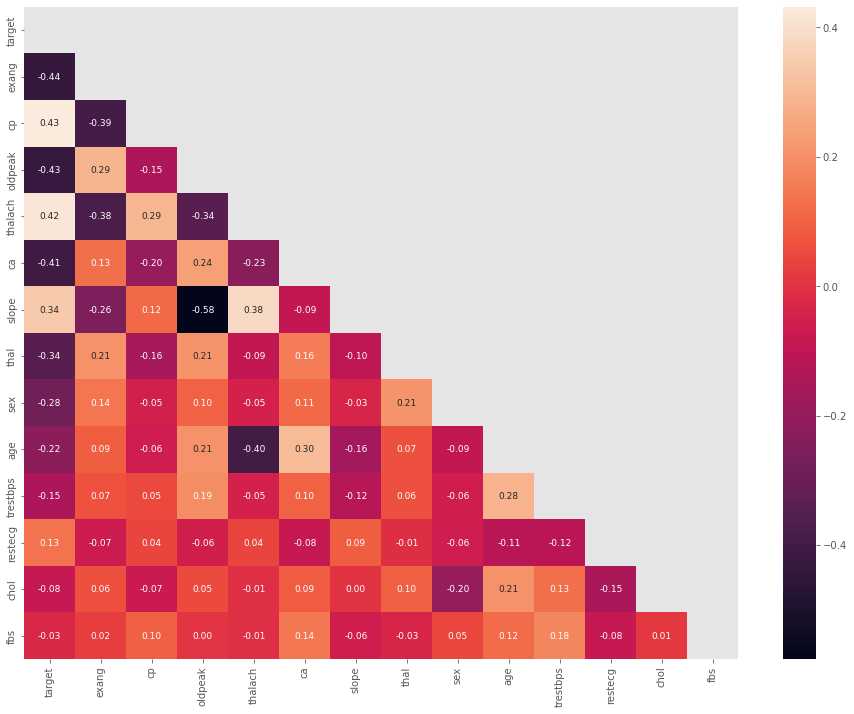

In [52]:
correlations_with_ref_to_target = dataset.corr().loc[:,'target']
top_correlations = correlations_with_ref_to_target.abs().sort_values(ascending=False).head(31)

top_correlations = dataset.loc[:,list(top_correlations.index)].corr()

mask = np.zeros_like(top_correlations)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,12))

g = sns.heatmap(top_correlations, annot=True, annot_kws={"size":9}, fmt='.2f', mask=mask)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

When target-centric correlations are sorted in descending order, we observe a few familiar variables that exhibit strong relationship with property target. 

- **`exang`** at -0.44, the property exang. 
- **`cp`** at 0.43 . 
- **`oldpeak`** -0.43 in 3rd place 
- **`thalach **0.42 in 4th place 
- **`ca`** -0.41 in 5th place 
- **`slope`** 0.34 in 6h. 
- **`thal	`** -0.34 in 10th place do exhibit positive correlation with SalePrice.

In [53]:
top_correlations

,target,exang,cp,oldpeak,thalach,ca,slope,thal,sex,age,trestbps,restecg,chol,fbs
target,1.000000,-0.435601,0.432080,-0.429146,0.419955,-0.408992,0.343940,-0.343101,-0.283609,-0.221476,-0.146269,0.134874,-0.081437,-0.026826
exang,-0.435601,1.000000,-0.392937,0.286766,-0.377411,0.125377,-0.256106,0.205826,0.143460,0.093216,0.068526,-0.068807,0.064099,0.024729
cp,0.432080,-0.392937,1.000000,-0.146692,0.293367,-0.195356,0.116854,-0.160370,-0.051740,-0.063107,0.046486,0.041561,-0.072682,0.096018
oldpeak,-0.429146,0.286766,-0.146692,1.000000,-0.342201,0.236560,-0.576314,0.209090,0.098322,0.206040,0.194600,-0.056251,0.050086,0.004514
thalach,0.419955,-0.377411,0.293367,-0.342201,1.000000,-0.228311,0.384754,-0.094910,-0.046439,-0.395235,-0.048023,0.041210,-0.005308,-0.007169
ca,-0.408992,0.125377,-0.195356,0.236560,-0.228311,1.000000,-0.092236,0.160085,0.113060,0.302261,0.099248,-0.083112,0.086878,0.144935
slope,0.343940,-0.256106,0.116854,-0.576314,0.384754,-0.092236,1.000000,-0.103314,-0.032990,-0.164124,-0.122873,0.090402,0.000417,-0.058654
thal,-0.343101,0.205826,-0.160370,0.209090,-0.094910,0.160085,-0.103314,1.000000,0.211452,0.065317,0.062870,-0.010473,0.096810,-0.032752
sex,-0.283609,0.143460,-0.051740,0.098322,-0.046439,0.113060,-0.032990,0.211452,1.000000,-0.094962,-0.057647,-0.060351,-0.195571,0.046022
age,-0.221476,0.093216,-0.063107,0.206040,-0.395235,0.302261,-0.164124,0.065317,-0.094962,1.000000,0.283121,-0.111590,0.207216,0.119492


<span style="color:magenta">**SUMMARY:** The columns I decided to keep to form Mew Features are these 8: target, exang, cp, oldpeak, thalach, ca, slope, and thal</span>

### Create New features - sex, cp, thalach, exang, ca, thal, chol, age

In [54]:
new_features = ['target','exang','cp','oldpeak','thalach','ca','slope','thal']

new_X = dataset[new_features]
new_X.head()

,target,exang,cp,oldpeak,thalach,ca,slope,thal
0,1,0,3,2.3,150,0,0,1
1,1,0,2,3.5,187,0,0,2
2,1,0,1,1.4,172,0,2,2
3,1,0,1,0.8,178,0,2,2
4,1,1,0,0.6,163,0,2,2


#### • Divide  new_X into W independent & v dependentets

In [55]:
v = new_X['target']
W = new_X.drop('target', axis=1)

In [56]:
W.head(5)

,exang,cp,oldpeak,thalach,ca,slope,thal
0,0,3,2.3,150,0,0,1
1,0,2,3.5,187,0,0,2
2,0,1,1.4,172,0,2,2
3,0,1,0.8,178,0,2,2
4,1,0,0.6,163,0,2,2


In [57]:
v.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### • Train and Test new features

In [58]:
X1_train, X1_test, y1_train, y1_test = train_test_split(W, v, test_size = 0.2, random_state=5)


#### • Standard Scaler

In [59]:
# 2) Scale data with Standard scaler
scaler = StandardScaler()
scale = scaler.fit(X1_train)
X1_train = scale.transform(X1_train)
X1_test = scale.transform(X1_test)

In [60]:
print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (241, 7)
X1_test : (61, 7)
y1_train: (241,)
y1_test : (61,)


#### •	Create Logreg Model based on New Features

In [61]:
logreg1 = sm.Logit(y1_train, X1_train).fit()

Optimization terminated successfully.
         Current function value: 0.363260
         Iterations 7


#### •	Print Logreg Summary based on New Features

In [62]:
print(logreg1.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  241
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 May 2023   Pseudo R-squ.:                  0.4687
Time:                        23:10:46   Log-Likelihood:                -87.546
converged:                       True   LL-Null:                       -164.78
Covariance Type:            nonrobust   LLR p-value:                 8.761e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6104      0.205     -2.977      0.003      -1.012      -0.208
x2             1.0095      0.211      4.794      0.000       0.597       1.422
x3            -0.7793      0.276     -2.826      0.0

#### •	Create Prediction Variable for  Logreg Model based on New Features

In [63]:
logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

#### •	Display - Logreg Model based on New Features


  •Confusion Matrix for Logistic Regression

Accuracy score 0.8360655737704918
Recall score 0.8518518518518519
Precision score 0.7931034482758621
f1 score 0.8214285714285715


<AxesSubplot:>

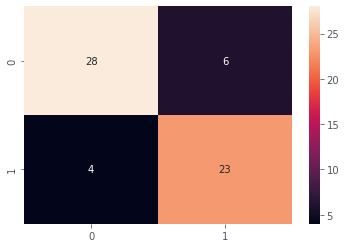

In [64]:
print('\n  •Confusion Matrix for Logistic Regression\n')

print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))

cm = confusion_matrix(y1_test,preds1)
sns.heatmap(cm,annot=True)

### Random Forests with selected data¶


#### •	Create Random Forest & Print  Accuracy for New Features

In [71]:
# Create Model
rfModel2 = RandomForestClassifier(n_estimators=40)
rfModel2.fit(X1_train,y1_train)

RandomForestClassifier(n_estimators=40)

In [72]:
# Accuracy for Random Forest
rfModel2.score(X1_test,y1_test)

0.8688524590163934

#### •	Create Prediction Variable for Random Forest based on New Features

In [73]:
rf_pred2 = rfModel2.predict(X1_test)
predsRF2 = list(map(round, rf_pred2))

#### •	Display Performance Measures & Confusion Matrix for Random Forest


  •Confusion Matrix for Random Forest•

Accuracy score 0.8688524590163934
Recall score 0.8888888888888888
Precision score 0.8275862068965517
f1 score 0.8571428571428572


<AxesSubplot:>

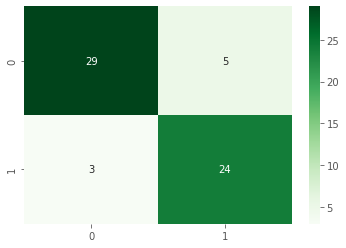

In [75]:
print('\n  •Confusion Matrix for Random Forest•\n')

print('Accuracy score',accuracy_score(y1_test, rf_pred2))
print('Recall score',recall_score(y1_test, rf_pred2))
print('Precision score',precision_score(y1_test, rf_pred2))
print('f1 score',f1_score(y1_test, rf_pred2))

cmRF = confusion_matrix(y1_test,rf_pred2)
sns.heatmap(cmRF,annot=True,cmap="Greens")

#### •	Evaluate Performance Measures & Confusion Matrix for Random Forest

<span style="color:magenta">**SUMMARY: Performance Measures Random Forest:**</span>
- Accuracy the model is correct 87%
- Recall the models ability to predict positive values is 89%
- Precision the models ability to correctly identify positive values is 83%
- f1 score the models Harmonic mean of recall and precision is 86%

<span style="color:magenta">**SUMMARY: Confusion Matrix Random Forest:**</span>
- Top-left: 29 TP – People who has Cardiovascular Disease algorithm correctly identified.
- Bottom-right: 24 TN - People who did not have CVD algorithm correctly identified
- Bottom-left: 3 FN – Has Cardiovascular Disease but algorithm says they did not.
- Top-right: 5 FP – People who do not have CVD but the algorithm saus they do.

<span style="color:magenta">**COMPARISON: Logistic Regression-Random Forest**</span>

These two Confusion Matrices are similar but Random Forest has the edge with 87% accuracy compared with Logistic Regression 84% accuracy. Random forest is the winner.